# Lab 9
## Preprocessing Techniques in NLP Using NLTK package

In this lab, we will be exploring how to preprocess tweets for sentiment analysis by using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing.

### Setup
We will use the Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly.

#### About the Twitter dataset
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis.

In [211]:
#Import the necessary libraries
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import pandas as pd
import numpy as np
import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations
import matplotlib.pyplot as plt            # library for visualization
import seaborn as sns                      # library for visualization

In [2]:
# download sample twitter dataset
nltk.download('twitter_samples')

all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ikath\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [3]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'list'>


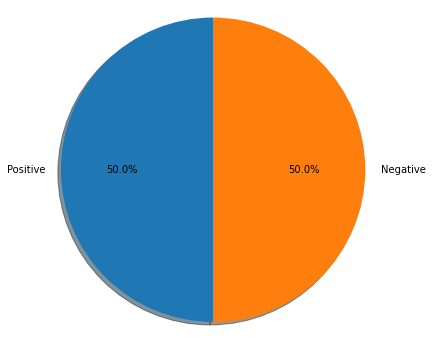

In [4]:
fig = plt.figure(figsize=(6, 6))

# labels for the two classes
labels = 'Positive', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

### Looking at raw texts
Understanding the data is responsible for 80% of the success or failure in data science projects.

In [5]:
# print a random tweet from positive and negative tweet
# positive in green, negative in red
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

welcome to KFCROLEPLAYERS enjoy &amp; lets be friend! :) @qimyerii @peixvodz @CSYDIH @YB0RA_ @awksungjaesey @krztall @ikonxbei
@cooldigangana @DiganganaS I want to attend ur birthday plssssssssssssssss :(


In [6]:
# a complex sample is selected
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


### Preprocessing steps
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:
1. Tokenizing the string
2. Lowercasing
3. Removing stop words and punctuation
4. Stemming

#### Remove hyperlinks,  Twitter marks and styles
Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [8]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

# remove hashtags
tweet = re.sub(r'#', '', tweet)

print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


#### Tokenize the string
To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet)

print()
print('Tokenized string:')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


#### Remove stop words and punctuations
The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

The stop words list above contains some words that could be important in some contexts. These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For this lab, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

In [11]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

# Remove stopwords and punctuation from the tweet_tokens
for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        
        # Append the clean word in the tweets_clean list
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


#### Stemming
Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.
Consider the words:
* **learn**
* **learn**ing
* **learn**ed
* **learn**t

All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

* **happ**y
* **happi**ness
* **happi**er

We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.

NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/).

In [14]:
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### Combining all the preprocessing steps
All the steps done above can be combined together into one function `process_tweet()`.

In [19]:
def process_tweet(tweet):
    """Process tweet function.
    Args:
        tweet: a string containing a tweet.
    Returns:
        tweets_clean: a list of words containing the processed tweet.

    """
    stemmer = PorterStemmer()
    
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    tweet = re.sub(r'#', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [20]:
# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### Building and Visualizing word frequencies
We will make a function, `build_freqs()`, which will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets.

In [21]:
tweets = all_positive_tweets + all_negative_tweets
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


#### Labeling
Building a labels array that matches the sentiments of our tweets. This data type works pretty much like a regular list but is optimized for computations and manipulation. The `labels` array will be composed of 10,000 elements. The first 5000 will be filled with **1** labels denoting positive sentiments, and the next 5000 will be **0** labels denoting the opposite.

In [22]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [60]:
def build_freqs(tweets, ys):
    """Build a word frequency dictionary.
    Args:
        tweets: a list of tweets.
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1).
    Returns:
        pos_freqs: a dictionary mapping each word with positive sentiment to its frequency.
        neg_freqs: a dictionary mapping each word with negative sentiment to its frequency.
    """
    yslist = np.squeeze(ys).tolist()

    pos_freqs = {}
    neg_freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            if word in pos_freqs and y == 1:
                pos_freqs[word] += 1

            elif word in neg_freqs and y == 0:
                neg_freqs[word] += 1

            else:
                if y == 1:
                    pos_freqs[word] = 1
                elif y == 0:
                    neg_freqs[word] = 1

    return pos_freqs, neg_freqs

In [61]:
pos_freqs, neg_freqs = build_freqs(tweets, labels)

print(f'types = {type(pos_freqs)}, {type(neg_freqs)}')

print(f'lengths = {len(pos_freqs)}, {len(neg_freqs)}')

types = <class 'dict'>, <class 'dict'>
lengths = 6623, 6444


In [91]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display pandas tables side by side.
    Args:
        dfs: list of pandas.DataFrame
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [99]:
freq_df = pd.DataFrame.from_dict({'positive_frequency': pos_freqs,
                                  'negative_frequency': neg_freqs})

top5_pos = freq_df.sort_values('positive_frequency', ascending=False).head(5)
top5_neg = freq_df.sort_values('negative_frequency', ascending=False).head(5)

display_side_by_side([top5_pos, top5_neg], ['top5_pos', 'top5_neg'])

,positive_frequency,negative_frequency
:),3568.000000,2.000000
:-),692.000000,nan
:D,629.000000,nan
thank,620.000000,107.000000
love,400.000000,152.000000
,positive_frequency,negative_frequency
:(,1.000000,4571.000000
:-(,nan,493.000000
i'm,183.000000,343.000000
...,289.000000,331.000000


#### Table of word counts
We will select a set of words that we would like to visualize. It is better to store this temporary information in a table that is very easy to use later.

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

In [141]:
# select some words to appear in the report
keys = [':)', ':-)', ':D', 'thank', 'love', ':(', ':-(', 'i\'m',
        '...', 'miss', 'happi', 'merri', 'nice', 'good', 'bad',
        'sad', 'mad', 'best', 'pretti', '❤', '😒', '😬', '😄',
        '😍', '♛', 'song', 'idea', 'power', 'play', 'magnific']

data = []

for word in keys:
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if word in pos_freqs:
        pos = pos_freqs[word]
        
    # retrieve number of negative counts
    if word in neg_freqs:
        neg = neg_freqs[word]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[[':)', 3568, 2],
 [':-)', 692, 0],
 [':D', 629, 0],
 ['thank', 620, 107],
 ['love', 400, 152],
 [':(', 1, 4571],
 [':-(', 0, 493],
 ["i'm", 183, 343],
 ['...', 289, 331],
 ['miss', 27, 301],
 ['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


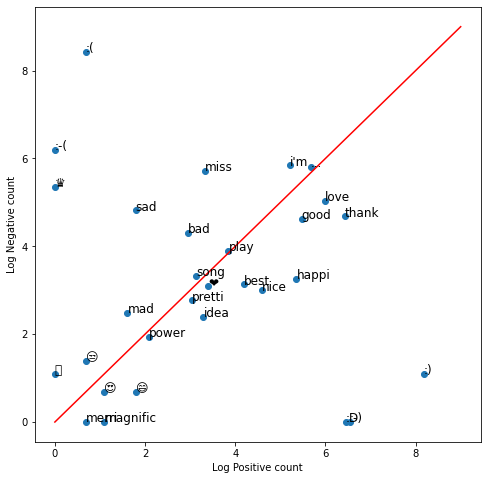

In [142]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

### Logistic Regression for Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [251]:
def sigmoid(x):
    """Implementing the sigmoid function for x.
    sig(x) = 1/(1+e^-x)

    Args:
        x: input for which signmoid function needs to be calculated.

    Returns:
        the sigmoid function.
    """
    return 1 / (1 + (np.exp(-x)))

In [252]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Args:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Returns:
        J: the final cost
        theta: your final weight vector
    '''
    m = x.shape[0]
    
    for i in range(0, num_iters):
        z = np.dot(x,theta)

        h = sigmoid(z)

        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

    J = float(J)
    return J, theta

In [274]:
def extract_features(tweet, pos_freqs, neg_freqs):
    '''Extracting features.
    Args:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Returns:
        x: a feature vector of dimension (1,3)
    '''
    word_list = process_tweet(tweet)

    x = np.zeros((1, 3))

    x[0,0] = 1

    for word in word_list:
        # increment the word count for the positive label 1
        x[0,1] += pos_freqs.get(word, 0)

        # increment the word count for the negative label 0
        x[0,2] += neg_freqs.get(word, 0)

    assert (x.shape == (1, 3))
    return x

In [267]:
X = tweets
y = labels
print('Number of tweets:', len(tweets))

Number of tweets: 10000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [278]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :] = extract_features(X_train[i], pos_freqs, neg_freqs)

# training labels corresponding to X
Y = y_train

In [280]:
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 100)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

KeyboardInterrupt: 

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

In [146]:
X = tweets
y = labels
print('Number of tweets:', len(tweets))

Number of tweets: 10000


In [147]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)

features = vectorizer.fit_transform(
    tweets
)

features_nd = features.toarray() # for easy usage

In [245]:
print('Number of training tweets:', len(X_train))
print('Number of testing tweets:', len(X_test))

Number of training tweets: 8000
Number of testing tweets: 2000


In [246]:
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)

In [247]:
y_pred = clf.predict(X_test)

In [248]:
print('CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))

CLASSIFICATION REPORT
               precision    recall  f1-score   support

         0.0       0.75      0.78      0.77      1007
         1.0       0.77      0.73      0.75       993

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000




CONFUSION MATRIX



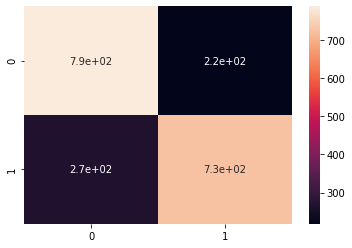

In [249]:
print('\nCONFUSION MATRIX\n')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [250]:
print('ACCURACY SCORE:', accuracy_score(y_test, y_pred))

ACCURACY SCORE: 0.758


In [199]:
pd.DataFrame({'True values': y_test, 'Predicted values': y_pred})

,True values,Predicted values
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,1.0,1.0
...,...,...
2995,1.0,1.0
2996,0.0,0.0
2997,0.0,1.0
2998,0.0,0.0
